#### **RF1 - Listagem de todos os times da NBA agrupados por Conferência**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

eastern_teams = pd.read_csv('../data/processed/eastern_conference_teams.csv')
western_teams = pd.read_csv('../data/processed/western_conference_teams.csv')

print("Times da Conferência Leste:")
display(eastern_teams.head())

print("Times da Conferência Oeste:")
display(western_teams.head())

Times da Conferência Leste:


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
4,1610612748,Miami Heat,MIA,Heat,Miami,Florida,1988


Times da Conferência Oeste:


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
1,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
2,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
3,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
4,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967


#### **RF2 - Apresentação da classificação atual dos times [Agrupados por Conferência]**

In [14]:
import os

def load_games_data(data_dir='../data/raw'):
    games_data = []
    for filename in os.listdir(data_dir):
        if filename.endswith('_games.csv'):
            team_name = filename.replace('_games.csv', '').replace('_', ' ')
            team_data = pd.read_csv(os.path.join(data_dir, filename))
            team_data['team_name'] = team_name
            games_data.append(team_data)
    return pd.concat(games_data, ignore_index=True)

games_data = load_games_data()
print("Dados dos jogos carregados:")
display(games_data.head())

def calculate_standings(games_data):
    standings = games_data.groupby('team_name').agg(
        wins=pd.NamedAgg(column='WL', aggfunc=lambda x: (x == 'W').sum()),
        losses=pd.NamedAgg(column='WL', aggfunc=lambda x: (x == 'L').sum())
    ).reset_index()
    standings['win_percentage'] = standings['wins'] / (standings['wins'] + standings['losses'])
    standings = standings.sort_values(by='win_percentage', ascending=False).reset_index(drop=True)
    return standings


standings = calculate_standings(games_data)
print("Classificação dos times:")
display(standings.head())

team_conferences = {
    'Atlanta Hawks': 'East', 'Boston Celtics': 'East', 'Cleveland Cavaliers': 'East', 
    'New Orleans Pelicans': 'West', 'Chicago Bulls': 'East', 'Dallas Mavericks': 'West', 
    'Denver Nuggets': 'West', 'Golden State Warriors': 'West', 'Houston Rockets': 'West', 
    'Los Angeles Clippers': 'West', 'Los Angeles Lakers': 'West', 'Miami Heat': 'East', 
    'Milwaukee Bucks': 'East', 'Minnesota Timberwolves': 'West', 'Brooklyn Nets': 'East', 
    'New York Knicks': 'East', 'Orlando Magic': 'East', 'Indiana Pacers': 'East', 
    'Philadelphia 76ers': 'East', 'Phoenix Suns': 'West', 'Portland Trail Blazers': 'West', 
    'Sacramento Kings': 'West', 'San Antonio Spurs': 'West', 'Oklahoma City Thunder': 'West', 
    'Toronto Raptors': 'East', 'Utah Jazz': 'West', 'Memphis Grizzlies': 'West', 
    'Washington Wizards': 'East', 'Detroit Pistons': 'East', 'Charlotte Hornets': 'East'
}

standings['conference'] = standings['team_name'].map(team_conferences)

eastern_standings = standings[standings['conference'] == 'East']
western_standings = standings[standings['conference'] == 'West']

print("Classificação da Conferência Leste:")
display(eastern_standings)

print("\nClassificação da Conferência Oeste:")
display(western_standings)

Dados dos jogos carregados:


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,team_name
0,22024,1610612737,ATL,Atlanta Hawks,22400612,2025-01-22,ATL vs. DET,L,241,104,...,15.0,32.0,47.0,25,14.0,3,13,14,-10.0,Atlanta Hawks
1,22024,1610612737,ATL,Atlanta Hawks,22400602,2025-01-20,ATL @ NYK,L,239,110,...,16.0,25.0,41.0,23,10.0,6,23,21,-9.0,Atlanta Hawks
2,22024,1610612737,ATL,Atlanta Hawks,22400587,2025-01-18,ATL @ BOS,W,265,119,...,13.0,42.0,55.0,27,9.0,10,17,17,4.0,Atlanta Hawks
3,22024,1610612737,ATL,Atlanta Hawks,22400563,2025-01-15,ATL @ CHI,W,240,110,...,14.0,37.0,51.0,28,11.0,5,9,15,16.0,Atlanta Hawks
4,22024,1610612737,ATL,Atlanta Hawks,22400556,2025-01-14,ATL vs. PHX,W,241,122,...,20.0,34.0,54.0,22,10.0,3,12,21,5.0,Atlanta Hawks


Classificação dos times:


,team_name,wins,losses,win_percentage
0,Los Angeles Lakers,2358,1657,0.587298
1,San Antonio Spurs,2298,1615,0.587273
2,Boston Celtics,2255,1709,0.568870
3,Utah Jazz,2175,1672,0.565376
4,Houston Rockets,2101,1714,0.550721


Classificação da Conferência Leste:


,team_name,wins,losses,win_percentage,conference
2,Boston Celtics,2255,1709,0.568870,East
8,Miami Heat,1832,1637,0.528106,East
9,Chicago Bulls,2014,1808,0.526949,East
11,Indiana Pacers,1930,1853,0.510177,East
12,Detroit Pistons,1931,1878,0.506957,East
14,Cleveland Cavaliers,1880,1888,0.498938,East
15,Milwaukee Bucks,1853,1902,0.493475,East
16,Atlanta Hawks,1840,1906,0.491191,East
18,Toronto Raptors,1286,1394,0.479851,East
19,New York Knicks,1795,1957,0.478412,East



Classificação da Conferência Oeste:


,team_name,wins,losses,win_percentage,conference
0,Los Angeles Lakers,2358,1657,0.587298,West
1,San Antonio Spurs,2298,1615,0.587273,West
3,Utah Jazz,2175,1672,0.565376,West
4,Houston Rockets,2101,1714,0.550721,West
5,Oklahoma City Thunder,2090,1716,0.549133,West
6,Phoenix Suns,2056,1747,0.540626,West
7,Portland Trail Blazers,2017,1769,0.532752,West
10,Dallas Mavericks,1970,1843,0.516654,West
13,Denver Nuggets,1882,1875,0.500932,West
17,Golden State Warriors,1843,1917,0.490160,West


#### **RF3 - Apresentar o total de vitórias e derrotas do time, separados por partidas jogadas em casa (mandante) e fora de casa (visitante),**

Resumo das Vitórias e Derrotas do Boston Celtics:
Total de Vitórias: 2255
Vitórias em Casa: 1326
Vitórias Fora de Casa: 929
Total de Derrotas: 1709
Derrotas em Casa: 669
Derrotas Fora de Casa: 1040


C:\Users\jacks\AppData\Local\Temp\ipykernel_17560\733756840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games['is_home'] = team_games['MATCHUP'].apply(lambda x: '@' not in x)
C:\Users\jacks\AppData\Local\Temp\ipykernel_17560\733756840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_games['is_away'] = team_games['MATCHUP'].apply(lambda x: '@' in x)


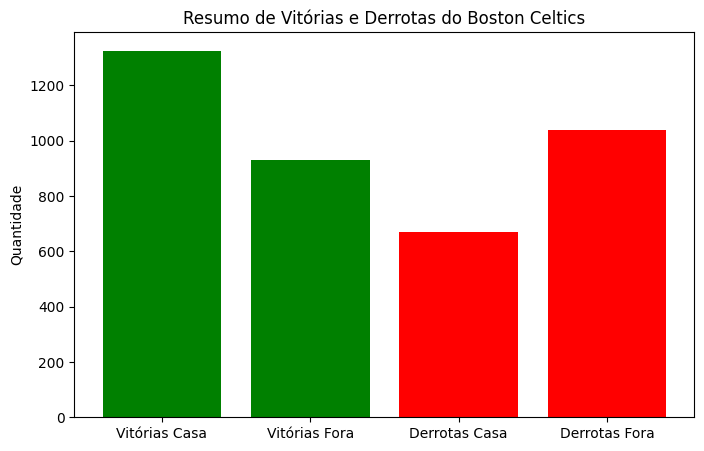

In [23]:
team_name = "Boston Celtics"

celtics_games = games_data[games_data['team_name'] == team_name]

def calculate_team_home_away_results(team_games):
    team_games['is_home'] = team_games['MATCHUP'].apply(lambda x: '@' not in x)
    team_games['is_away'] = team_games['MATCHUP'].apply(lambda x: '@' in x)
    
    total_wins = (team_games['WL'] == 'W').sum()
    home_wins = ((team_games['WL'] == 'W') & (team_games['is_home'])).sum()
    away_wins = ((team_games['WL'] == 'W') & (team_games['is_away'])).sum()

    total_losses = (team_games['WL'] == 'L').sum()
    home_losses = ((team_games['WL'] == 'L') & (team_games['is_home'])).sum()
    away_losses = ((team_games['WL'] == 'L') & (team_games['is_away'])).sum()

    results = {
        'Total de Vitórias': total_wins,
        'Vitórias em Casa': home_wins,
        'Vitórias Fora de Casa': away_wins,
        'Total de Derrotas': total_losses,
        'Derrotas em Casa': home_losses,
        'Derrotas Fora de Casa': away_losses
    }

    return results

celtics_results = calculate_team_home_away_results(celtics_games)

print("Resumo das Vitórias e Derrotas do Boston Celtics:")
for key, value in celtics_results.items():
    print(f"{key}: {value}")

labels = ['Vitórias Casa', 'Vitórias Fora', 'Derrotas Casa', 'Derrotas Fora']
values = [
    celtics_results['Vitórias em Casa'],
    celtics_results['Vitórias Fora de Casa'],
    celtics_results['Derrotas em Casa'],
    celtics_results['Derrotas Fora de Casa']
]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'green', 'red', 'red'])
plt.title(f"Resumo de Vitórias e Derrotas do {team_name}")
plt.ylabel("Quantidade")
plt.show()

